In [10]:
# plot from downloaded data
import os
import pandas as pd

env_name = 'MPE'
methods_select = ['COMA', 'QMIX', 'SQDDPG', 'STAS',
                  'Ours (Linear)', 'Ours']
scenario_select = ['simple_tag_n3', 'simple_tag_n6', "simple_tag_n15"]
for i in range(3):
    scenario_select.append(f"{scenario_select[i]}_nonlinear")

print(scenario_select)
# map_method_to_method_name = {
#     'Pred (Linear)': 'Ours (Linear)',
# }


root_dir = f"./data/{env_name}/"
print(os.path.exists(root_dir))
rewards_list = []
data_dict = {}
data_dict[env_name] = {}
for scenario_tag in scenario_select:
    data_dict[env_name][scenario_tag] = {}
    for method_name in methods_select:
        data_dict[env_name][scenario_tag][method_name] = {}
        data_dir = os.path.join(root_dir, scenario_tag, method_name)
        if not os.path.exists(data_dir):
            print("Skip: ", data_dir)
            continue
        d_list = os.listdir(data_dir)
        # load from csv
        for d in d_list:
            if d[-4:] != ".csv":
                continue
            seed = d[:-4].split("_")[-1]
            raw_data = pd.read_csv(os.path.join(data_dir, d))
            for row_key in raw_data.keys():
                if row_key == "Step" or 'MIN' in row_key or 'MAX' in row_key:
                    continue
                rewards = raw_data[row_key]
            data_dict[env_name][scenario_tag][method_name][seed] = rewards[: 800]

['simple_tag_n3', 'simple_tag_n6', 'simple_tag_n15', 'simple_tag_n3_nonlinear', 'simple_tag_n6_nonlinear', 'simple_tag_n15_nonlinear']
True


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from plot_utils import *
# plt.style.use('fivethirtyeight')
sorted_methods_list = methods_select


def draw_each(env_name, data_dict, i, color_list, map_method_to_name):
    plt.subplot(i)

    for method in sorted_methods_list:
        data = data_dict[method]
        color = color_list[method]
        seed_num = len(data.keys())
        len_list = [len(data[k_d]) for k_d in data.keys()]
        if len(len_list) == 0:
            print(f"Skip {env_name} {method}, since no data")
            continue
        max_length = np.array(len_list).max()
        # print(method, data.keys(), max_length)

        timestep = np.arange(max_length)  # / 100

        reward_plot = np.zeros((seed_num, max_length))
        for meth_name, data_i in data.items():
            if len(data_i) == max_length:
                reward_plot = np.array(list(data_i))[np.newaxis, :]
                # reward_plot = np.nan_to_num(reward_plot)
                reward_plot = reward_plot.repeat(seed_num, axis=0)
                break
        lw = 2.5

        for index, run_name in enumerate(data.keys()):
            data[run_name] = np.nan_to_num(data[run_name])
            reward_plot[index, :len(data[run_name])] = data[run_name]
        reward = np.array(reward_plot)
        r_mean, r_std = np.mean(reward, axis=0), np.std(reward, axis=0, ddof=1)
        # if config['min_value'] is not None:
        # plt.ylim(config['min_value'], config['max_value'])
        # plt.xlim(-1, config['max_step'])
        # plt.ylim(-2., 0.5)
        # else:
        # plt.set_ylim(x.min() *2, x.max()*2)

        import matplotlib as mpl
        mpl.rcParams['axes.formatter.use_mathtext'] = True
        mpl.rcParams['mathtext.fontset'] = 'stix'
        mpl.rcParams['font.size'] = 20

        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        # plt.set_yticklabels(plt.get_yticks(), fontsize=20)
        # plt.set_xticklabels(plt.get_xticks(), fontsize=20)
        # timestep = (timestep / 10000).i
        plt.plot(timestep * 100, exponential_moving_average(r_mean, 0.1), color=color,
                 label=map_method_to_name[method],  # +'-' + str(seed_num),
                 linewidth=lw, linestyle='solid',
                 )
        # set yticks
        # plt.xticks(np.arange(0, 80000, 10000))
        # print(method, r_mean)
        # r_std = r_std * 0.7
        plt.fill_between(timestep * 100, exponential_moving_average(r_mean - r_std, 0.1), exponential_moving_average(r_mean + r_std, 0.1), alpha=0.1,
                         color=color)
        # if 'causal' in config["method"]:
    # plt.legend(loc="best", bbox_to_anchor=(1.0, 0.0), borderaxespad=0.1, borderpad=0.2, fontsize=7)
    # plt.ylabel('Reward', fontsize=32)

    axes = plt.gca()
    axes.set_title(env_name, fontsize=32, y=1.07)

    plt.xlabel('Number of Episodes', fontsize=25, loc='center')  # $(×10^4)
    plt.grid()

6 6
['COMA', 'QMIX', 'SQDDPG', 'STAS', 'CAST-L', 'CAST']


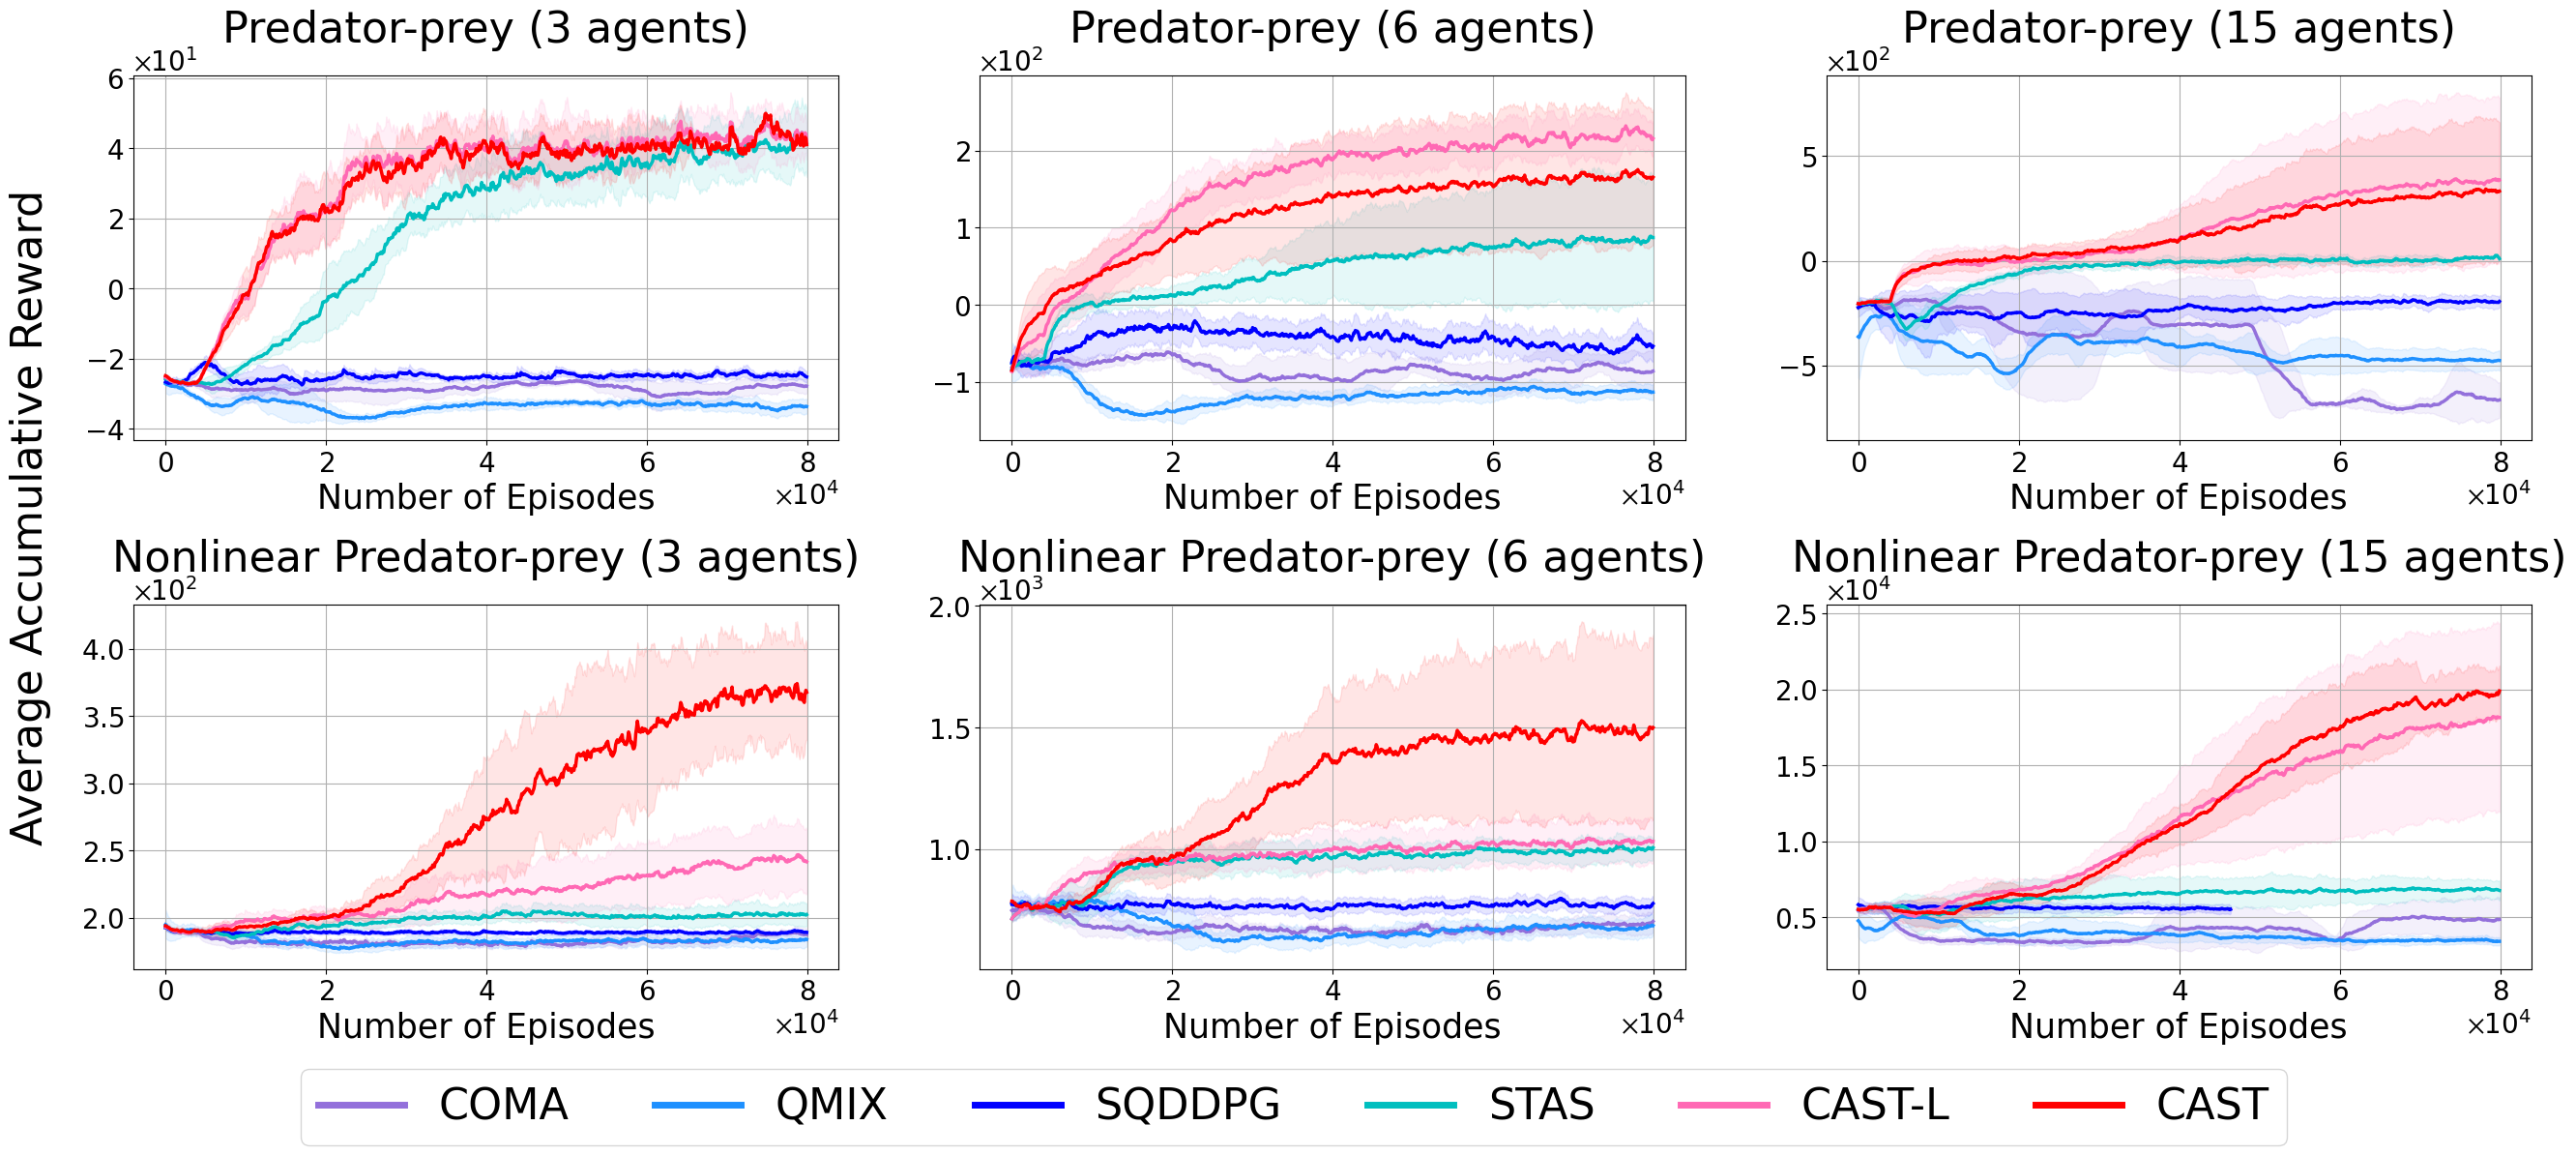

In [12]:
# plot each scenario as a subplot, and each method as a line
# for each env
COLORs = ['r', 'hotpink', 'c', 'b', 'dodgerblue', 'mediumpurple',
          'cadetblue', 'steelblue', 'mediumslateblue', 'hotpink', 'mediumturquoise']
METHODs = methods_select

COLORs = reversed(COLORs[:len(METHODs)])

color_dict = {k: v for k, v in zip(METHODs, COLORs)}
LINE_STYPLEs = ['solid' for i in range(20)]
pos_dict = {
    'simple_tag_n3': 231,
    'simple_tag_n6': 232,
    'simple_tag_n15': 233,
    'simple_tag_n3_nonlinear': 234,
    'simple_tag_n6_nonlinear': 235,
    'simple_tag_n15_nonlinear': 236,
}
map_scenario_to_name = {
    'simple_tag_n3': 'Predator-prey (3 agents)',
    'simple_tag_n6': 'Predator-prey (6 agents)',
    'simple_tag_n15': 'Predator-prey (15 agents)',
    'simple_tag_n3_nonlinear': 'Nonlinear Predator-prey (3 agents)',
    'simple_tag_n6_nonlinear': 'Nonlinear Predator-prey (6 agents)',
    'simple_tag_n15_nonlinear': 'Nonlinear Predator-prey (15 agents)',
}
map_method_to_name = {k: k for k in METHODs}
map_method_to_name.update({
    'Ours': 'CAST',
    'Ours (Linear)': 'CAST-L',
})
plt.figure(figsize=(32, 12))
# print([k for k, v in DATA.items()])
# plt.text(0.06, 0.5, "y_label", va='center', rotation='vertical', fontsize=32)
for scenario_tag, data_for_each_env in data_dict['MPE'].items():
    # print(env_name)
    if scenario_tag in pos_dict:
        i = pos_dict[scenario_tag]
    else:
        print(
            f"Skipping environment {scenario_tag} because it is not in the pos_dict dictionary.")
        continue

    draw_each(map_scenario_to_name[scenario_tag],
              data_for_each_env, i, color_list=color_dict, map_method_to_name=map_method_to_name)


fig = plt.gcf()
ax = fig.get_axes()[0]
handles, labels = ax.get_legend_handles_labels()
# plt.legend(loc="best", bbox_to_anchor=(1.0, 0.0), borderaxespad=0.1, borderpad=0.2, fontsize=7)
print(len(handles), len(labels))
print(labels)
# labels = [s.split('---5')[0] for s in labels]
# labels = METHODs
fig.text(0.085, 0.5, "Average Accumulative Reward",
         va='center', rotation='vertical', fontsize=32)
# fig.text(0.5, 0.0, "Number of frames $(×10^4)$", ha='center', va='center', fontsize=32)

legend = fig.legend(handles, labels, loc='lower center', ncol=7, fontsize=32,
                    bbox_to_anchor=(0.5, -0.06), bbox_transform=fig.transFigure)

for line in legend.get_lines():
    line.set_linewidth(5)
plt.subplots_adjust(hspace=0.45)


plt.savefig("main_results.pdf", bbox_inches='tight')
plt.show()